## Predicting Earnings from Census Data

The United States government periodically collects demographic information by conducting a census.

In this problem, we are going to use census information about an individual to predict how much a person earns -- in particular, whether the person earns more than $50,000 per year. This data comes from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Adult) .

The file census.csv contains 1994 census data for 31,978 individuals in the United States.

The dataset includes the following 13 variables:

- age = the age of the individual in years
- workclass = the classification of the individual's working status (does the person work for the federal government, work for the local government, work without pay, and so on)
- education = the level of education of the individual (e.g., 5th-6th grade, high school graduate, PhD, so on)
- maritalstatus = the marital status of the individual
- occupation = the type of work the individual does (e.g., administrative/clerical work, farming/fishing, sales and so on)
- relationship = relationship of individual to his/her household
- race = the individual's race
- sex = the individual's sex
- capitalgain = the capital gains of the individual in 1994 (from selling an asset such as a stock or bond for more than the original purchase price)
- capitalloss = the capital losses of the individual in 1994 (from selling an asset such as a stock or bond for less than the original purchase price)
- hoursperweek = the number of hours the individual works per week
- nativecountry = the native country of the individual
- over50k = whether or not the individual earned more than $50,000 in 1994

### A Logistic Regression Model

Let's begin by building a logistic regression model to predict whether an individual's earnings are above $50,000 (the variable "over50k") using all of the other variables as independent variables. First, read the dataset census.csv into R.

Then, split the data randomly into a training set and a testing set, setting the seed to 2000 before creating the split. Split the data so that the training set contains 60% of the observations, while the testing set contains 40% of the observations.

Next, build a logistic regression model to predict the dependent variable "over50k", using all of the other variables in the dataset as independent variables. Use the training set to build the model.

In [1]:
census = read.csv('./dataset/census.csv')

In [2]:
library('caTools')
set.seed(2000)

In [3]:
split = sample.split(census$over50k, SplitRatio=0.6)
train = subset(census, split == TRUE)
test = subset(census, split == FALSE)

In [5]:
Logcensus = glm(over50k ~ ., data=train, family='binomial')
summary(Logcensus)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = over50k ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.1065  -0.5037  -0.1804  -0.0008   3.3383  

Coefficients: (1 not defined because of singularities)
                                           Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -8.658e+00  1.379e+00  -6.279 3.41e-10
age                                       2.548e-02  2.139e-03  11.916  < 2e-16
workclass Federal-gov                     1.105e+00  2.014e-01   5.489 4.03e-08
workclass Local-gov                       3.675e-01  1.821e-01   2.018 0.043641
workclass Never-worked                   -1.283e+01  8.453e+02  -0.015 0.987885
workclass Private                         6.012e-01  1.626e-01   3.698 0.000218
workclass Self-emp-inc                    7.575e-01  1.950e-01   3.884 0.000103
workclass Self-emp-not-inc                1.855e-01  1.774e-01   1.046 0.295646
workclass State-gov                      

In [8]:
LogCensusPred = predict(Logcensus, newdata=test, type='response')
table(test$over50k, LogCensusPred > 0.5)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


        
         FALSE TRUE
   <=50K  9051  662
   >50K   1190 1888

In [9]:
accuracy = (9051 + 1888) / nrow(test)
accuracy

[1] 0.8552107

In [12]:
table(train$over50k)
baseline = rep("<=50K", nrow(test))
table(test$over50k, baseline)[1] / nrow(test)


 <=50K   >50K 
 14570   4617 

[1] 0.7593621

In [13]:
table(test$over50k)


 <=50K   >50K 
  9713   3078 

In [14]:
library("ROCR")

Loading required package: gplots


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess




In [15]:
pred = prediction(LogCensusPred, test$over50k)
as.numeric(performance(pred, "auc")@y.values)

[1] 0.9061598

### A CART Model

We have just seen how the logistic regression model for this data achieves a high accuracy. Moreover, the significances of the variables give us a way to gauge which variables are relevant for this prediction task. However, it is not immediately clear which variables are more important than the others, especially due to the large number of factor variables in this problem.

Let us now build a classification tree to predict "over50k". Use the training set to build the model, and all of the other variables as independent variables. Use the default parameters, so don't set a value for minbucket or cp. Remember to specify method="class" as an argument to rpart, since this is a classification problem. After you are done building the model, plot the resulting tree.

In [16]:
library("rpart")
library("rpart.plot")

In [17]:
CARTover = rpart(over50k ~ ., data=train, method='class')
summary(CARTover)

Call:
rpart(formula = over50k ~ ., data = train, method = "class")
  n= 19187 

          CP nsplit rel error    xerror       xstd
1 0.12183236      0 1.0000000 1.0000000 0.01282467
2 0.06562703      2 0.7563353 0.7660819 0.01163352
3 0.03747022      3 0.6907083 0.7132337 0.01131225
4 0.01000000      4 0.6532380 0.6562703 0.01094053

Variable importance
 relationship maritalstatus   capitalgain     education           sex 
           27            26            12            10             8 
   occupation           age  hoursperweek 
            7             6             3 

Node number 1: 19187 observations,    complexity param=0.1218324
  predicted class= <=50K  expected loss=0.2406317  P(node) =1
    class counts: 14570  4617
   probabilities: 0.759 0.241 
  left son=2 (10478 obs) right son=3 (8709 obs)
  Primary splits:
      relationship  splits as  RLLLLR, improve=1391.9300, (0 missing)
      maritalstatus splits as  LRRLLLL, improve=1375.6510, (0 missing)
      capitalgain   

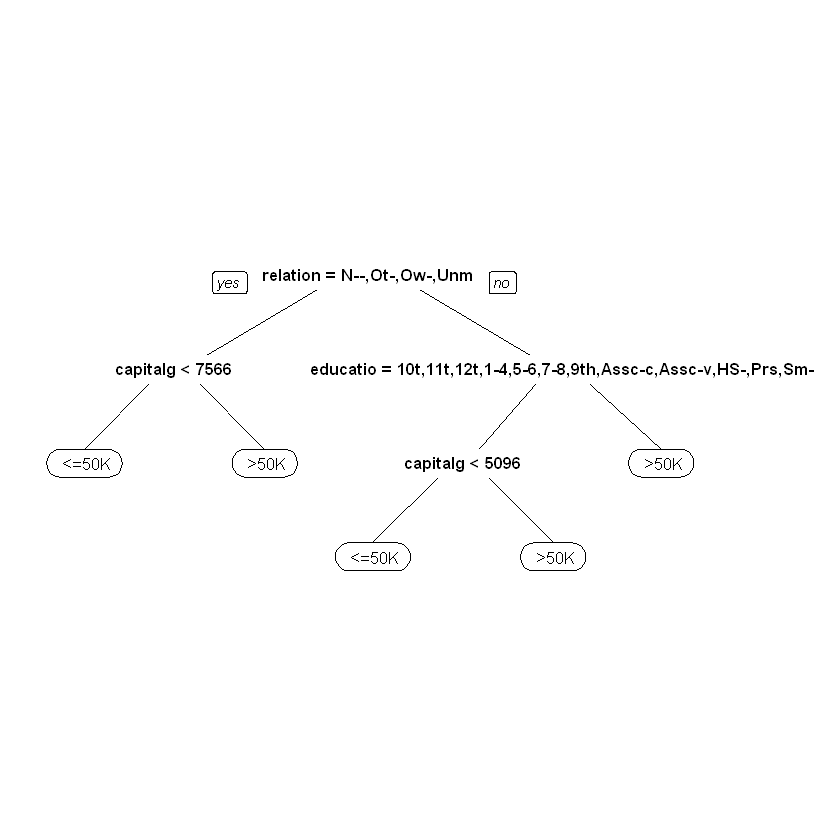

In [18]:
prp(CARTover)

In [19]:
CARTpred = predict(CARTover, newdata=test, type='class')

In [22]:
table(test$over50k, CARTpred)

        CARTpred
          <=50K  >50K
   <=50K   9243   470
   >50K    1482  1596

In [23]:
accuracy = (9243 + 1596) / nrow(test)
accuracy

[1] 0.8473927